# Introduction(TO DO)

# Describe the problem and the source of data(TO DO)

# Import needed libraries and setting global variables

In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, plot_confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB

# sns.set_theme(style="whitegrid")
plt.style.use("seaborn")
random_state = 42

# Data Cleaning

In [179]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


## Describe the data statistically and visualize the data

In [180]:
df["Pregnancies"].unique()

array([ 2,  0,  1,  4,  8,  3,  6,  5,  7, 10, 12,  9, 11, 13, 15, 17, 14])

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


### Check for wrong values

In [182]:
df.replace(0,np.NaN).isnull().sum()

Pregnancies                  301
Glucose                       13
BloodPressure                 90
SkinThickness                573
Insulin                      956
BMI                           28
DiabetesPedigreeFunction       0
Age                            0
Outcome                     1316
dtype: int64

### Feature Domain
- Pregenancies: can have 0 as values
- Gloucose: cannot have 0  as values
- BloodPressure: cannot have 0  as values
- SkinThickness: cannot have 0  as values
- Insulin: cannot have 0  as values
- BMI: cannot have 0  as values
- DiabetesPedigreeFunctionL: cannot have 0  as values
- Age: cannot have 0  as values

so, we have two solution either delete the feature or replace the wrong value with the mean value.
Insulin and SkinThickness have more wrong values, we delete them and replace the wrong value with the mean for other feature.

In [183]:
df.drop("Insulin", axis=1, inplace=True)
df.drop("SkinThickness", axis=1, inplace=True)

In [184]:
# replace 0 value with None
df['Glucose'].replace(0,np.NaN,inplace=True)
df['BloodPressure'].replace(0,np.NaN,inplace=True)
df['BMI'].replace(0,np.NaN,inplace=True)
print(f"Glucose: {df.Glucose.mean()}\nBloodPressure: {df.BloodPressure.mean()}\nBMI: {df.BMI.mean()}")

Glucose: 121.97533970810267
BloodPressure: 72.40366492146597
BMI: 32.6501014198783


In [185]:
# replace nan with the mean for each feature
df['Glucose'].fillna(df['Glucose'].mean(),inplace=True)
df['BloodPressure'].fillna(df['BloodPressure'].mean(), inplace = True)
df['BMI'].fillna(df['BMI'].median(), inplace = True)
print(f"Glucose: {df.Glucose.mean()}\nBloodPressure: {df.BloodPressure.mean()}\nBMI: {df.BMI.mean()}")

Glucose: 121.97533970810267
BloodPressure: 72.40366492146597
BMI: 32.6466


### Describing the data
- Pregenancies:
- Gloucose: 
- BloodPressure: 
- SkinThickness: 
- Insulin: 
- BMI: 
- DiabetesPedigreeFunction: 
- Age: 

In [186]:
df.describe()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.975340,72.403665,32.646600,0.470930,33.090500,0.342000
std,3.306063,30.533114,11.949531,7.190196,0.323553,11.786423,0.474498
min,0.000000,44.000000,24.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,27.600000,0.244000,24.000000,0.000000
50%,3.000000,118.000000,72.000000,32.400000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,80.600000,2.420000,81.000000,1.000000


<AxesSubplot:xlabel='Outcome', ylabel='count'>

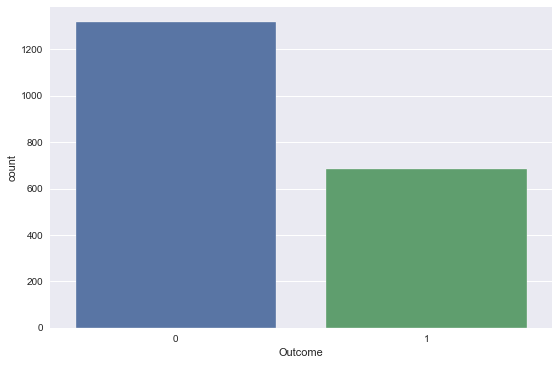

In [187]:
# show the number of people having diabete and not having, 0: not have, 1: have diabete
sns.countplot(x=df['Outcome'])

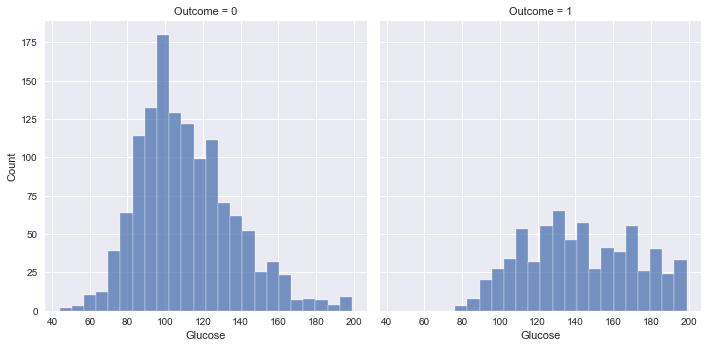

In [188]:
# Glucose distributtion, and same for the following figures
sns.displot(data=df, x="Glucose", col="Outcome")
plt.show()

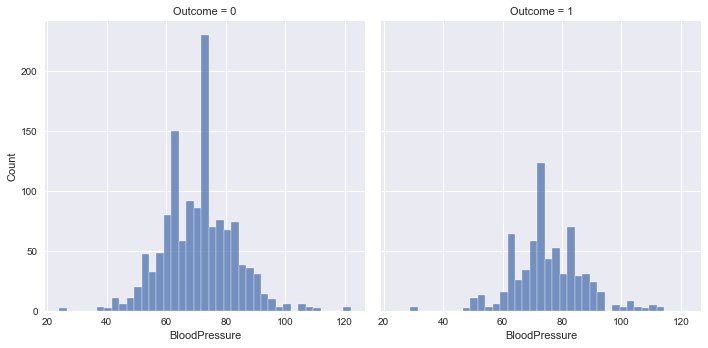

In [189]:
sns.displot(data=df, x="BloodPressure", col="Outcome")
plt.show()

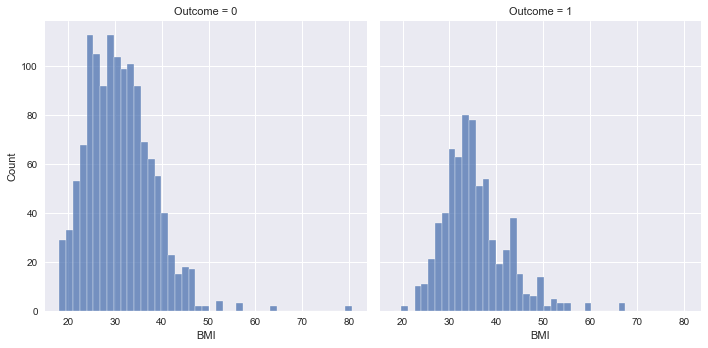

In [190]:
sns.displot(data=df, x="BMI", col="Outcome")
plt.show()

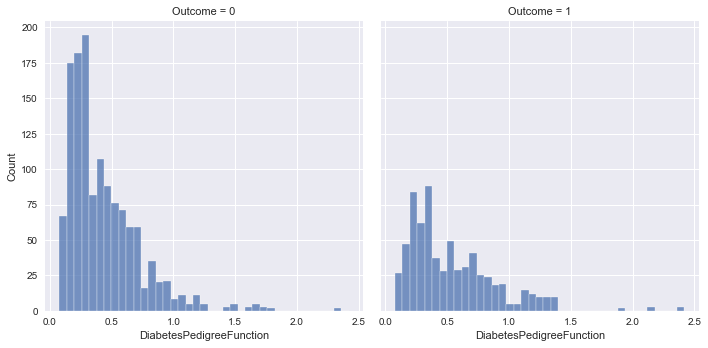

In [191]:
sns.displot(data=df, x="DiabetesPedigreeFunction", col="Outcome")
plt.show()

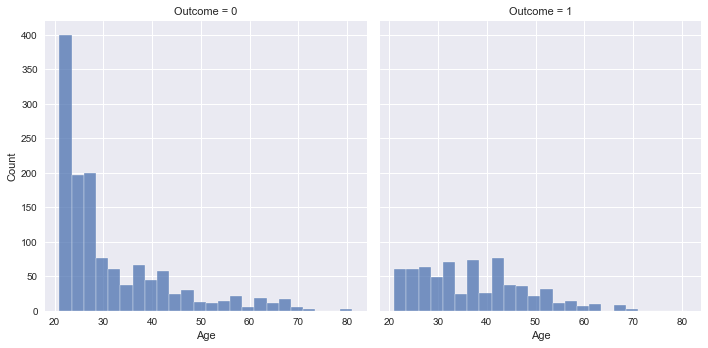

In [192]:
sns.displot(data=df, x="Age", col="Outcome")
plt.show()

<AxesSubplot:>

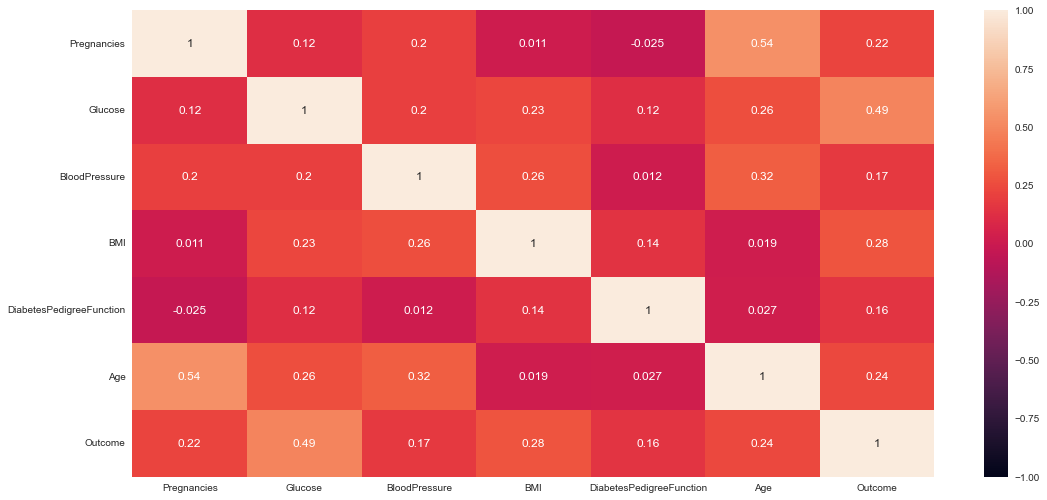

In [193]:
# Corrleation give information about what the most feature that have an effect on the outcome
plt.figure(figsize=(16, 8))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1)

## Preprocessing the data

In [194]:
# Create matrix of feature and vector of outcome
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

In [195]:
# split the data
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=random_state)

# Models

In [196]:
# we use this varible to store information about models scores
models_metrics = {}

## Grid Search Explanation(TO DO)

[Small Article explaning grid search](https://towardsdatascience.com/grid-search-for-hyperparameter-tuning-9f63945e8fec)

## K-Nearest Neighbors

In [197]:
# dictionary that hold the parameters and the values we want to test
param_dict = {
    "n_neighbors":[1,3,5,7,9,100,200,300,400,500,600,700,800,900,1000,1100],
    "weights": ["uniform", "distance"],
}
# cv: cross validationo, scoring is the metric we use compare between each model
knn_gs = GridSearchCV(KNeighborsClassifier(), param_grid=param_dict, cv=5, scoring="accuracy")

In [198]:
# train the model, and extract the best parameter 
knn_gs.fit(train_X, train_y)
knn_param = knn_gs.best_params_

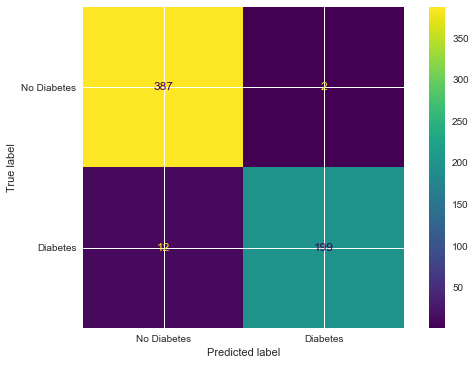

In [199]:
# predict the test set and draw the confusion matrix
test_predict = knn_gs.predict(test_X)
ConfusionMatrixDisplay.from_estimator(knn_gs, test_X, test_y, display_labels=["No Diabetes", "Diabetes"])
plt.show()

In [200]:
# other metric 
knn_accuracy = accuracy_score(test_y, test_predict)
knn_precision  = precision_score(test_y, test_predict)
knn_recall  = recall_score(test_y, test_predict)
print(f"Accuracy: {knn_accuracy}\nPrecision: {knn_precision}\nRecall: {knn_recall}")

Accuracy: 0.9766666666666667
Precision: 0.9900497512437811
Recall: 0.943127962085308


In [201]:
# adding the result to compare it later
models_metrics["KNN"] = [knn_accuracy, knn_precision, knn_recall]

## Naive bayes 

In [202]:
# we don't find parameter to tune in this model
clf_gnb = GaussianNB()
clf_gnb.fit(train_X, train_y)

GaussianNB()

In [203]:
# predict the test set, and print the result
gnb_prediction = clf_gnb.predict(test_X)
gnb_accuracy = accuracy_score(test_y, gnb_prediction)
gnb_precision = precision_score(test_y, gnb_prediction)
gnb_recall = recall_score(test_y, gnb_prediction)
print(f"Accuracy: {gnb_accuracy}\nPrecision: {gnb_precision}\nRecall: {gnb_recall}")

Accuracy: 0.79
Precision: 0.7202072538860104
Recall: 0.6587677725118484


In [204]:
# Save the result
models_metrics["NB"] = [gnb_accuracy, gnb_precision, gnb_recall]

## Decision Tree

#### CCP
We use Cost-Complixity Path from the start to find the best tree

In [205]:
# get the list of alphas 
clf_dt = DecisionTreeClassifier(random_state=random_state)
ccp_alphas = clf_dt.cost_complexity_pruning_path(train_X, train_y)["ccp_alphas"] # list of possible alphas
ccp_alphas

array([0.        , 0.00065476, 0.00067857, 0.00068878, 0.00069388,
       0.00069597, 0.00070578, 0.00093764, 0.00095238, 0.00095238,
       0.00095238, 0.00107143, 0.00107143, 0.00107143, 0.00119048,
       0.00119048, 0.00122449, 0.00122449, 0.00122789, 0.00125   ,
       0.00125   , 0.00126984, 0.0012782 , 0.00133333, 0.00133929,
       0.00136778, 0.00136905, 0.00138655, 0.00140306, 0.00141783,
       0.0015692 , 0.001578  , 0.00159929, 0.00171429, 0.00176786,
       0.00177551, 0.00178548, 0.00190476, 0.00190476, 0.00196192,
       0.00197252, 0.00204082, 0.00204082, 0.00204365, 0.00205782,
       0.00216086, 0.00219643, 0.00222222, 0.00222527, 0.00234328,
       0.00248339, 0.00258018, 0.00262857, 0.0026455 , 0.00265254,
       0.00266358, 0.00278986, 0.00296102, 0.00296309, 0.00298336,
       0.00312547, 0.00347523, 0.00351087, 0.00363778, 0.00364808,
       0.00380952, 0.00395824, 0.00416667, 0.00426694, 0.00439352,
       0.00448545, 0.00454226, 0.00514088, 0.00533695, 0.00585

In [206]:
# iterate over the list of alphas, 
# create the decision tree with the corresponded alpha and train the model with cross validation
# and append the alpha value with the score accuracy to alpha list
alphas_list = []
for alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=random_state, ccp_alpha=alpha)
    scores = cross_val_score(clf_dt, train_X, train_y, scoring="accuracy", cv=5)
    alphas_list.append([alpha, np.mean(scores)])

# create dataframe of alpha
alphas_df = pd.DataFrame(alphas_list, columns=["Alpha", "Mean"])
alphas_df.sort_values("Mean", ascending=False).head()

,Alpha,Mean
0,0.000000,0.927143
2,0.000679,0.926429
3,0.000689,0.926429
4,0.000694,0.926429
5,0.000696,0.926429


In [207]:
# extract the best alpha that have higher score from the list
best_alpha = float(alphas_df.sort_values("Mean", ascending=False).head(1)["Alpha"])
best_alpha

0.0

In [208]:
# create the decision tree with the alpha 
clf_dt = DecisionTreeClassifier(random_state=random_state, ccp_alpha=best_alpha)
clf_dt.fit(train_X, train_y)

DecisionTreeClassifier(random_state=42)

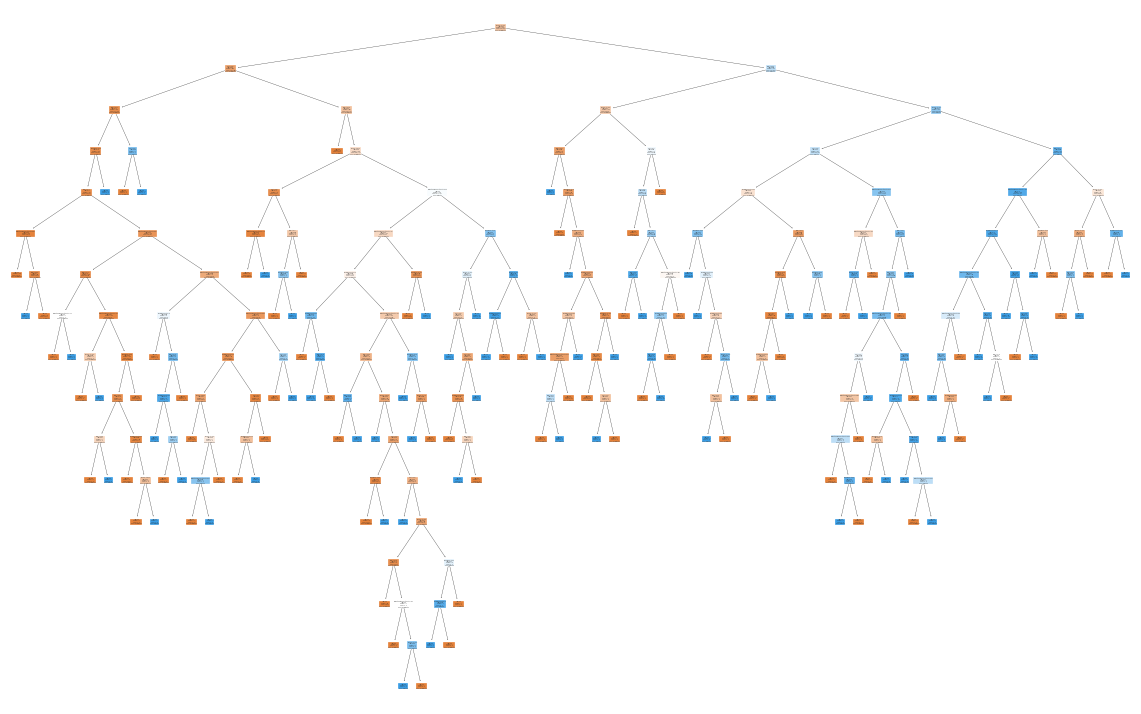

In [209]:
# draw the tree
plt.figure(figsize=(18, 12))
plot_tree(clf_dt, feature_names=X.columns, class_names=["No Diabetes", "Diabetes"], filled=True)
plt.show()

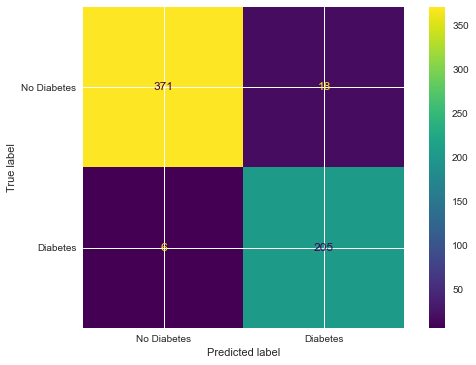

In [210]:
# drawing the confusion matrix
ConfusionMatrixDisplay.from_estimator(clf_dt, test_X, test_y, display_labels=["No Diabetes", "Diabetes"])
plt.show()

In [211]:
# showing other metrix
dt_prediction = clf_dt.predict(test_X)
dt_accuracy = accuracy_score(test_y, dt_prediction)
dt_precision = precision_score(test_y, dt_prediction)
dt_recall = recall_score(test_y, dt_prediction)
print(f"Accuracy: {dt_accuracy}\nPrecision: {dt_precision}\nRecall: {dt_recall}")

Accuracy: 0.96
Precision: 0.9192825112107623
Recall: 0.9715639810426541


In [212]:
# adding the model result to compare with other model
models_metrics["DT"] = [dt_accuracy, dt_precision, dt_recall]

## Random Forest

In [213]:
# dictionary that hold the hyperparameter that we want to test
# n_estimators: the number of tree
# criterion: the method to compute the information gain
# max_feature: the number of feature in every tree
param_dict = {
    "n_estimators":[50,100,200,400,800],
    "criterion": ["gini", "entropy"],
    "max_features": ["sqrt", "log2", 2, 5]
}
rf_gs = GridSearchCV(RandomForestClassifier(), param_grid=param_dict, cv=5, scoring="accuracy")

In [214]:
# train the model
rf_gs.fit(train_X, train_y)
rf_param = rf_gs.best_params_

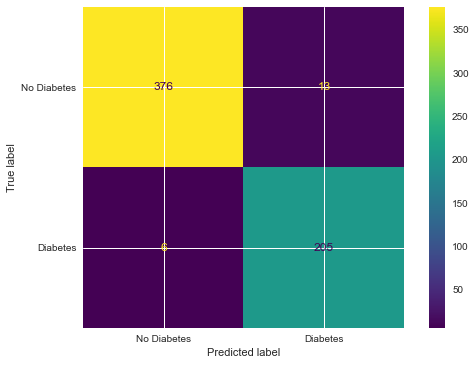

In [216]:
# predict the test set
test_predict = rf_gs.predict(test_X)
ConfusionMatrixDisplay.from_estimator(rf_gs, test_X, test_y, display_labels=["No Diabetes", "Diabetes"])
plt.show()

In [217]:
# other metrics
rf_accuracy = accuracy_score(test_y, test_predict)
rf_precision  = precision_score(test_y, test_predict)
rf_recall  = recall_score(test_y, test_predict)
print(f"Accuracy: {rf_accuracy}\nPrecision: {rf_precision}\nRecall: {rf_recall}")

Accuracy: 0.9683333333333334
Precision: 0.9403669724770642
Recall: 0.9715639810426541


In [218]:
# Adding model result
models_metrics["RF"] = [rf_accuracy, rf_precision, rf_recall]

## Voting Models

In [219]:
# create the models for voting ensemble with the best parameter we found
estimators = [("knn", KNeighborsClassifier(n_neighbors=knn_param["n_neighbors"])), 
              ("nb", GaussianNB()),
              ("dt", DecisionTreeClassifier(random_state=random_state, ccp_alpha=best_alpha)), 
              ("rf", RandomForestClassifier(random_state=random_state,
                                            max_features=rf_param["max_features"], 
                                            criterion=rf_param["criterion"], 
                                            n_estimators=rf_param["n_estimators"]))]
weights = [models_metrics["KNN"][0], models_metrics["NB"][0], models_metrics["DT"][0], models_metrics["RF"][0] ]

In [220]:
param_dict = {
    "voting": ["hard", "soft"],
    "weights": [None, weights]
}
voting_gs = GridSearchCV(VotingClassifier(estimators=estimators), 
                         param_grid=param_dict,
                         cv=5)
voting_gs.fit(train_X, train_y)

GridSearchCV(cv=5,
             estimator=VotingClassifier(estimators=[('knn',
                                                     KNeighborsClassifier(n_neighbors=100)),
                                                    ('nb', GaussianNB()),
                                                    ('dt',
                                                     DecisionTreeClassifier(random_state=42)),
                                                    ('rf',
                                                     RandomForestClassifier(criterion='entropy',
                                                                            max_features='sqrt',
                                                                            n_estimators=800,
                                                                            random_state=42))]),
             param_grid={'voting': ['hard', 'soft'],
                         'weights': [None,
                                     [0.9766666666666667, 0.

In [221]:
test_prediction = voting_gs.predict(test_X)
voting_accuracy = accuracy_score(test_y, test_prediction)
voting_precision = precision_score(test_y, test_prediction)
voting_recall = recall_score(test_y, test_prediction)
print(f"Accuracy: {voting_accuracy}\nPrecision: {voting_precision}\nRecall: {voting_recall}")
models_metrics["VOTING"] = [voting_accuracy, voting_precision, voting_recall]

Accuracy: 0.9666666666666667
Precision: 0.95260663507109
Recall: 0.95260663507109


# Conclusion(TO DO)

## Compare the models(TO DO)

In [222]:
# create a dataframe from models results
metrics_df = pd.DataFrame(models_metrics.values(), 
                          columns=["Accuracy", "Percision", "Recall"], 
                          index=models_metrics.keys())
metrics_df

,Accuracy,Percision,Recall
KNN,0.976667,0.990050,0.943128
NB,0.790000,0.720207,0.658768
DT,0.960000,0.919283,0.971564
RF,0.968333,0.940367,0.971564
VOTING,0.966667,0.952607,0.952607


Text(0.5, 1.0, 'Recall')

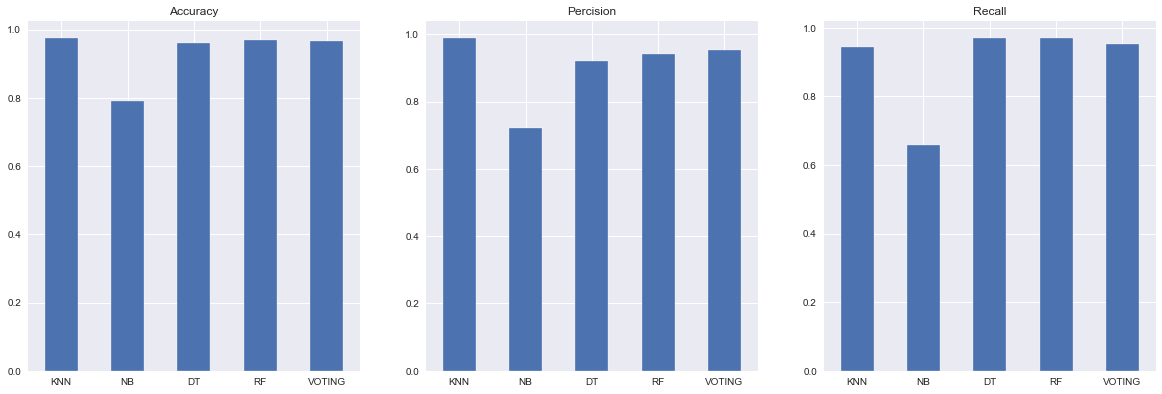

In [223]:
# create figure comparing result of different models
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
metrics_df["Accuracy"].plot(kind="bar", ax=axes[0], rot=0)
axes[0].set_title("Accuracy")
metrics_df["Percision"].plot(kind="bar", ax=axes[1], rot=0)
axes[1].set_title("Percision")
metrics_df["Recall"].plot(kind="bar", ax=axes[2], rot=0)
axes[2].set_title("Recall")